# IDTA Coursework 1: Task 1 - Descriptive Analytics
## Task 1a: Basic Statistics for All Attributes
## Task 1b: Visualizations (1 Boxplot + 4 Relationship Plots)

### Import Required Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### 1. Load and Explore Dataset

In [67]:
# Load dataset
df = pd.read_csv('Depression Professional Dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nData Types:")
print(df.dtypes)

print(f"\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (2054, 11)

First few rows:
   Gender  Age  Work Pressure  Job Satisfaction Sleep Duration Dietary Habits  \
0  Female   37              2                 4      7-8 hours       Moderate   
1    Male   60              4                 3      5-6 hours      Unhealthy   
2  Female   42              2                 3      5-6 hours       Moderate   
3  Female   44              3                 5      7-8 hours        Healthy   
4    Male   48              4                 3      7-8 hours       Moderate   

  Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
0                                    No           6                 2   
1                                   Yes           0                 4   
2                                    No           0                 2   
3                                   Yes           1                 2   
4                                   Yes           6                 5   

  Family History of Mental Illn

### 2. Identify Numerical and Categorical Attributes

In [68]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Attributes ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  • {col}")

print(f"\nCategorical Attributes ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  • {col}")

print(f"\nTotal Attributes: {len(numerical_cols) + len(categorical_cols)}")

Numerical Attributes (5):
  • Age
  • Work Pressure
  • Job Satisfaction
  • Work Hours
  • Financial Stress

Categorical Attributes (6):
  • Gender
  • Sleep Duration
  • Dietary Habits
  • Have you ever had suicidal thoughts ?
  • Family History of Mental Illness
  • Depression

Total Attributes: 11


## TASK 1A: DESCRIPTIVE STATISTICS FOR ALL ATTRIBUTES

### Numerical Attributes Statistics

In [69]:
print("="*80)
print("NUMERICAL ATTRIBUTES - DETAILED STATISTICS")
print("="*80)

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Count:      {df[col].count()}")
    print(f"  Mean:       {df[col].mean():.2f}")
    print(f"  Std Dev:    {df[col].std():.2f}")
    print(f"  Min:        {df[col].min():.2f}")
    print(f"  Q1 (25%):   {df[col].quantile(0.25):.2f}")
    print(f"  Median:     {df[col].median():.2f}")
    print(f"  Q3 (75%):   {df[col].quantile(0.75):.2f}")
    print(f"  Max:        {df[col].max():.2f}")
    print(f"  IQR:        {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
    print(f"  Skewness:   {df[col].skew():.3f}")
    print(f"  Kurtosis:   {df[col].kurtosis():.3f}")

NUMERICAL ATTRIBUTES - DETAILED STATISTICS

Age:
  Count:      2054
  Mean:       42.17
  Std Dev:    11.46
  Min:        18.00
  Q1 (25%):   35.00
  Median:     43.00
  Q3 (75%):   51.75
  Max:        60.00
  IQR:        16.75
  Skewness:   -0.356
  Kurtosis:   -0.844

Work Pressure:
  Count:      2054
  Mean:       3.02
  Std Dev:    1.42
  Min:        1.00
  Q1 (25%):   2.00
  Median:     3.00
  Q3 (75%):   4.00
  Max:        5.00
  IQR:        2.00
  Skewness:   -0.015
  Kurtosis:   -1.307

Job Satisfaction:
  Count:      2054
  Mean:       3.02
  Std Dev:    1.42
  Min:        1.00
  Q1 (25%):   2.00
  Median:     3.00
  Q3 (75%):   4.00
  Max:        5.00
  IQR:        2.00
  Skewness:   0.009
  Kurtosis:   -1.309

Work Hours:
  Count:      2054
  Mean:       5.93
  Std Dev:    3.77
  Min:        0.00
  Q1 (25%):   3.00
  Median:     6.00
  Q3 (75%):   9.00
  Max:        12.00
  IQR:        6.00
  Skewness:   0.010
  Kurtosis:   -1.250

Financial Stress:
  Count:      2054
  Mean

### Summary Table of Numerical Statistics

In [70]:
# Create comprehensive statistics table for numerical attributes
stats_data = []
for col in numerical_cols:
    stats_data.append({
        'Attribute': col,
        'Count': df[col].count(),
        'Mean': round(df[col].mean(), 2),
        'Std_Dev': round(df[col].std(), 2),
        'Min': df[col].min(),
        'Q1': round(df[col].quantile(0.25), 2),
        'Median': round(df[col].median(), 2),
        'Q3': round(df[col].quantile(0.75), 2),
        'Max': df[col].max()
    })

stats_table = pd.DataFrame(stats_data)
print("\nNumerical Attributes Summary Table:")
print(stats_table.to_string(index=False))

# Save to CSV
stats_table.to_csv('output_files/Task1a_Numerical_Statistics.csv', index=False)
print("\n✓ Saved to: output_files/Task1a_Numerical_Statistics.csv")


Numerical Attributes Summary Table:
       Attribute  Count  Mean  Std_Dev  Min   Q1  Median    Q3  Max
             Age   2054 42.17    11.46   18 35.0    43.0 51.75   60
   Work Pressure   2054  3.02     1.42    1  2.0     3.0  4.00    5
Job Satisfaction   2054  3.02     1.42    1  2.0     3.0  4.00    5
      Work Hours   2054  5.93     3.77    0  3.0     6.0  9.00   12
Financial Stress   2054  2.98     1.41    1  2.0     3.0  4.00    5

✓ Saved to: output_files/Task1a_Numerical_Statistics.csv


### Categorical Attributes Statistics

In [71]:
print("="*80)
print("CATEGORICAL ATTRIBUTES - FREQUENCY ANALYSIS")
print("="*80)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique Values: {df[col].nunique()}")
    print(f"  Mode: {df[col].mode()[0]}")
    print(f"  Value Counts:")
    vc = df[col].value_counts()
    for val, count in vc.items():
        pct = (count / len(df)) * 100
        print(f"    {val}: {count:4d} ({pct:5.1f}%)")

CATEGORICAL ATTRIBUTES - FREQUENCY ANALYSIS

Gender:
  Unique Values: 2
  Mode: Male
  Value Counts:
    Male: 1066 ( 51.9%)
    Female:  988 ( 48.1%)

Sleep Duration:
  Unique Values: 4
  Mode: 7-8 hours
  Value Counts:
    7-8 hours:  530 ( 25.8%)
    Less than 5 hours:  525 ( 25.6%)
    5-6 hours:  505 ( 24.6%)
    More than 8 hours:  494 ( 24.1%)

Dietary Habits:
  Unique Values: 3
  Mode: Unhealthy
  Value Counts:
    Unhealthy:  713 ( 34.7%)
    Healthy:  681 ( 33.2%)
    Moderate:  660 ( 32.1%)

Have you ever had suicidal thoughts ?:
  Unique Values: 2
  Mode: No
  Value Counts:
    No: 1065 ( 51.9%)
    Yes:  989 ( 48.1%)

Family History of Mental Illness:
  Unique Values: 2
  Mode: No
  Value Counts:
    No: 1046 ( 50.9%)
    Yes: 1008 ( 49.1%)

Depression:
  Unique Values: 2
  Mode: No
  Value Counts:
    No: 1851 ( 90.1%)
    Yes:  203 (  9.9%)


### Summary Table of Categorical Statistics

In [72]:
# Create categorical statistics summary
categorical_stats = []
for col in categorical_cols:
    categorical_stats.append({
        'Attribute': col,
        'Unique_Values': df[col].nunique(),
        'Mode': df[col].mode()[0],
        'Mode_Frequency': df[col].value_counts().max(),
        'Mode_Percentage': round((df[col].value_counts().max() / len(df)) * 100, 2)
    })

categorical_table = pd.DataFrame(categorical_stats)
print("\nCategorical Attributes Summary Table:")
print(categorical_table.to_string(index=False))

# Save to CSV
categorical_table.to_csv('output_files/Task1a_Categorical_Statistics.csv', index=False)
print("\n✓ Saved to: output_files/Task1a_Categorical_Statistics.csv")


Categorical Attributes Summary Table:
                            Attribute  Unique_Values      Mode  Mode_Frequency  Mode_Percentage
                               Gender              2      Male            1066            51.90
                       Sleep Duration              4 7-8 hours             530            25.80
                       Dietary Habits              3 Unhealthy             713            34.71
Have you ever had suicidal thoughts ?              2        No            1065            51.85
     Family History of Mental Illness              2        No            1046            50.93
                           Depression              2        No            1851            90.12

✓ Saved to: output_files/Task1a_Categorical_Statistics.csv


## TASK 1B: VISUALIZATIONS (5 REQUIRED)

### Creating 5 Visualizations: 1 Boxplot + 4 Relationship Plots

✓ Figure 1 created: Age Boxplot


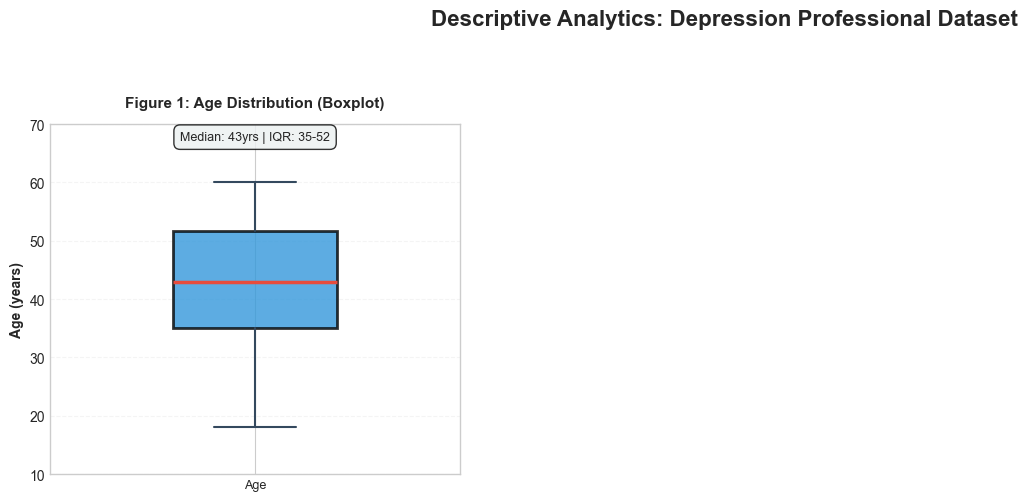

In [73]:
# Create a large figure with 6 subplots with improved sizing
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Descriptive Analytics: Depression Professional Dataset', fontsize=16, fontweight='bold', y=0.995)

# =====================================================================
# VISUALIZATION 1: BOXPLOT OF AGE (REQUIRED)
# =====================================================================
ax1 = plt.subplot(2, 3, 1)
bp = ax1.boxplot(df['Age'], vert=True, patch_artist=True, widths=0.4)

# Customize boxplot with better colors and styling
for patch in bp['boxes']:
    patch.set_facecolor('#3498db')
    patch.set_alpha(0.8)
    patch.set_linewidth(2)
for median in bp['medians']:
    median.set(color='#e74c3c', linewidth=2.5)
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5, color='#34495e')
for cap in bp['caps']:
    cap.set(linewidth=1.5, color='#34495e')

ax1.set_ylabel('Age (years)', fontsize=10, fontweight='bold')
ax1.set_title('Figure 1: Age Distribution (Boxplot)', fontsize=11, fontweight='bold', pad=12)
ax1.grid(True, alpha=0.2, axis='y', linestyle='--')
ax1.set_xticklabels(['Age'], fontsize=9)
ax1.set_ylim(10, 70)

# Add statistics as annotations
age_median = df['Age'].median()
age_q1 = df['Age'].quantile(0.25)
age_q3 = df['Age'].quantile(0.75)
ax1.text(0.5, 0.98, f'Median: {age_median:.0f}yrs | IQR: {age_q1:.0f}-{age_q3:.0f}', 
         transform=ax1.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='#ecf0f1', alpha=0.8, pad=0.5))

print("✓ Figure 1 created: Age Boxplot")

✓ Fixed and improved Figure 2 created


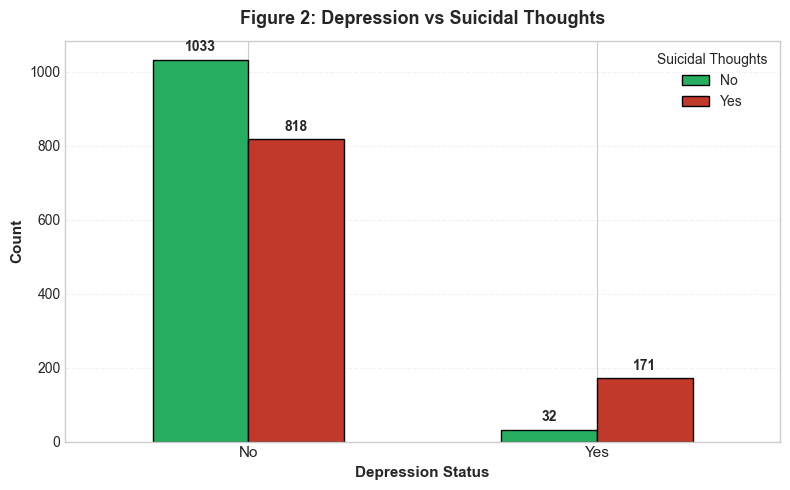

In [74]:
# Increase figure size BEFORE subplots
plt.figure(figsize=(8, 5))

# =====================================================================
# VISUALIZATION 2: DEPRESSION VS SUICIDAL THOUGHTS
# =====================================================================
ax2 = plt.subplot(1, 1, 1)   # single plot → more space

# Cross-tab
depression_suicidal = pd.crosstab(
    df['Depression'],
    df['Have you ever had suicidal thoughts ?']
)

# Plot
bars = depression_suicidal.plot(
    kind='bar',
    ax=ax2,
    color=['#27ae60', '#c0392b'],
    width=0.55,
    edgecolor='black',
    linewidth=1
)

# Titles
ax2.set_title(
    'Figure 2: Depression vs Suicidal Thoughts',
    fontsize=13, fontweight='bold', pad=12
)
ax2.set_xlabel('Depression Status', fontsize=11, fontweight='bold')
ax2.set_ylabel('Count', fontsize=11, fontweight='bold')

# X labels — horizontal so NO overlap
ax2.set_xticklabels(depression_suicidal.index, rotation=0, fontsize=11)

# Legend
ax2.legend(
    title='Suicidal Thoughts',
    labels=['No', 'Yes'],
    fontsize=10,
    title_fontsize=10,
    loc='upper right',
    framealpha=0.9
)

# Add value labels with proper spacing above bars
for container in ax2.containers:
    ax2.bar_label(
        container,
        fmt='%d',
        fontsize=10,
        fontweight='bold',
        padding=4       # << prevents overlap
    )

# Grid
ax2.grid(axis='y', linestyle='--', alpha=0.25)
ax2.set_axisbelow(True)

plt.tight_layout()
print("✓ Fixed and improved Figure 2 created")


✓ Fixed and improved Figure 3 created


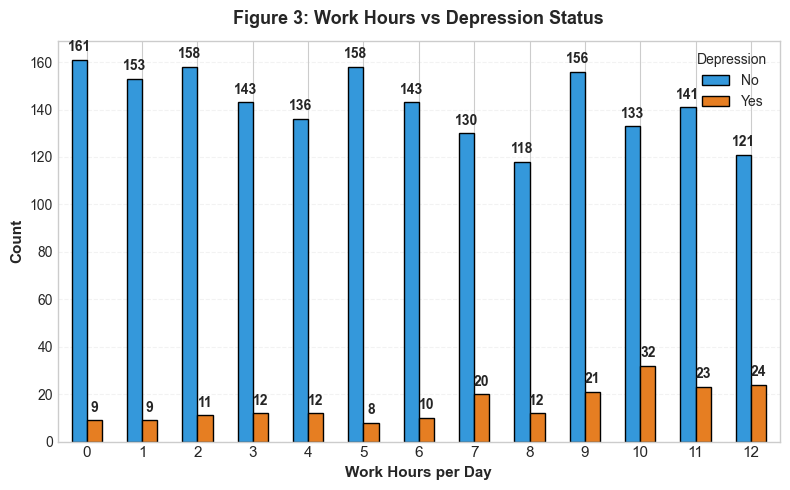

In [75]:
# Increase figure size BEFORE subplots
plt.figure(figsize=(8, 5))

# =====================================================================
# VISUALIZATION 3: WORK HOURS VS DEPRESSION (RELATIONSHIP)
# =====================================================================
ax3 = plt.subplot(1, 1, 1)   # single plot → more space

work_depression = df.groupby(['Work Hours', 'Depression']).size().unstack(fill_value=0)
bars = work_depression.plot(kind='bar', ax=ax3, color=['#3498db', '#e67e22'], 
                     width=0.55, edgecolor='black', linewidth=1)

ax3.set_title('Figure 3: Work Hours vs Depression Status', fontsize=13, fontweight='bold', pad=12)
ax3.set_xlabel('Work Hours per Day', fontsize=11, fontweight='bold')
ax3.set_ylabel('Count', fontsize=11, fontweight='bold')
ax3.legend(title='Depression', labels=['No', 'Yes'], fontsize=10, title_fontsize=10, loc='upper right', framealpha=0.9)
ax3.set_xticklabels(work_depression.index, rotation=0, fontsize=11)
ax3.grid(axis='y', linestyle='--', alpha=0.25)
ax3.set_axisbelow(True)

# Add value labels with proper spacing above bars
for container in ax3.containers:
    ax3.bar_label(
        container,
        fmt='%d',
        fontsize=10,
        fontweight='bold',
        padding=4       # << prevents overlap
    )

plt.tight_layout()
print("✓ Fixed and improved Figure 3 created")

✓ Fixed and improved Figure 4 created


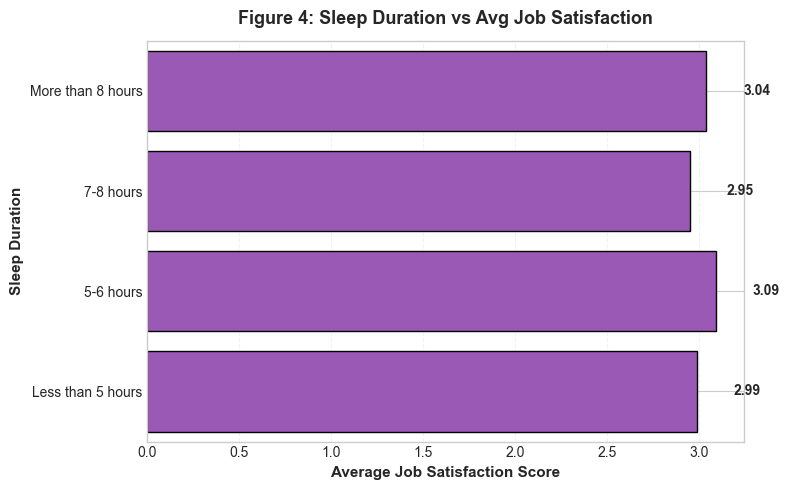

In [76]:
# Increase figure size BEFORE subplots
plt.figure(figsize=(8, 5))

# =====================================================================
# VISUALIZATION 4: SLEEP DURATION VS JOB SATISFACTION (RELATIONSHIP)
# =====================================================================
ax4 = plt.subplot(1, 1, 1)   # single plot → more space

sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sleep_sat = df.groupby('Sleep Duration')['Job Satisfaction'].mean().reindex(sleep_order)

bars = ax4.barh(sleep_sat.index, sleep_sat.values, color='#9b59b6', edgecolor='black', 
                 linewidth=1)

ax4.set_title('Figure 4: Sleep Duration vs Avg Job Satisfaction', fontsize=13, fontweight='bold', pad=12)
ax4.set_xlabel('Average Job Satisfaction Score', fontsize=11, fontweight='bold')
ax4.set_ylabel('Sleep Duration', fontsize=11, fontweight='bold')
ax4.grid(axis='x', linestyle='--', alpha=0.25)
ax4.set_axisbelow(True)
ax4.set_ylim(-0.5, len(sleep_sat)-0.5)

# Add value labels with better formatting
for i, (idx, val) in enumerate(sleep_sat.items()):
    ax4.text(val + 0.2, i, f'{val:.2f}', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
print("✓ Fixed and improved Figure 4 created")

✓ Fixed and improved Figure 5 created


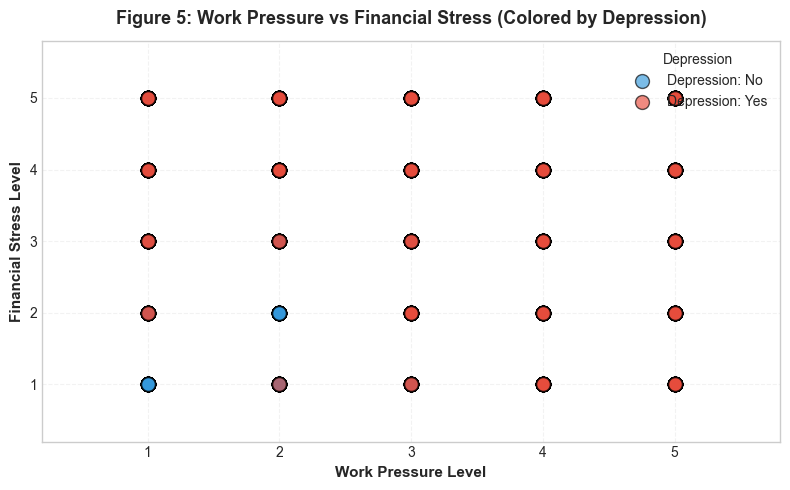

In [77]:
# Increase figure size BEFORE subplots
plt.figure(figsize=(8, 5))

# =====================================================================
# VISUALIZATION 5: WORK PRESSURE VS FINANCIAL STRESS (RELATIONSHIP - SCATTER)
# =====================================================================
ax5 = plt.subplot(1, 1, 1)   # single plot → more space

colors = {'Yes': '#e74c3c', 'No': '#3498db'}
for depression in ['No', 'Yes']:
    mask = df['Depression'] == depression
    ax5.scatter(df[mask]['Work Pressure'], df[mask]['Financial Stress'],
               alpha=0.65, s=100, label=f'Depression: {depression}',
               color=colors[depression], edgecolors='black', linewidth=1)

ax5.set_title('Figure 5: Work Pressure vs Financial Stress (Colored by Depression)', 
             fontsize=13, fontweight='bold', pad=12)
ax5.set_xlabel('Work Pressure Level', fontsize=11, fontweight='bold')
ax5.set_ylabel('Financial Stress Level', fontsize=11, fontweight='bold')
ax5.legend(title='Depression', fontsize=10, title_fontsize=10, loc='upper right', framealpha=0.9)
ax5.grid(axis='both', alpha=0.25, linestyle='--')
ax5.set_axisbelow(True)
ax5.set_xticks(range(1, 6))
ax5.set_yticks(range(1, 6))
ax5.set_xlim(0.2, 5.8)
ax5.set_ylim(0.2, 5.8)

plt.tight_layout()
print("✓ Fixed and improved Figure 5 created")

✓ Fixed and improved Figure 6 created


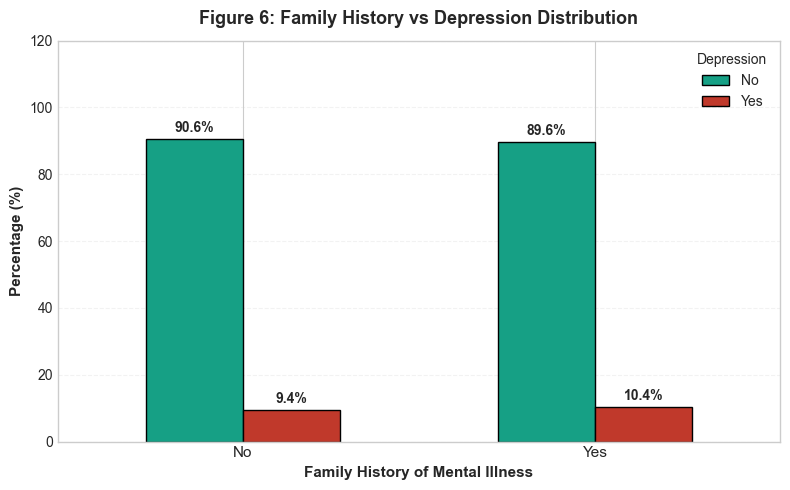

In [78]:
# Increase figure size BEFORE subplots
plt.figure(figsize=(8, 5))

# =====================================================================
# VISUALIZATION 6: FAMILY HISTORY VS DEPRESSION (RELATIONSHIP)
# =====================================================================
ax6 = plt.subplot(1, 1, 1)   # single plot → more space

family_depression = pd.crosstab(df['Family History of Mental Illness'], df['Depression'])
family_depression_pct = family_depression.div(family_depression.sum(axis=1), axis=0) * 100

bars = family_depression_pct.plot(kind='bar', ax=ax6, color=['#16a085', '#c0392b'], 
                           width=0.55, edgecolor='black', linewidth=1, stacked=False)

ax6.set_title('Figure 6: Family History vs Depression Distribution', fontsize=13, fontweight='bold', pad=12)
ax6.set_xlabel('Family History of Mental Illness', fontsize=11, fontweight='bold')
ax6.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax6.legend(title='Depression', labels=['No', 'Yes'], fontsize=10, title_fontsize=10, loc='upper right', framealpha=0.9)
ax6.set_xticklabels(['No', 'Yes'], rotation=0, fontsize=11)
ax6.grid(axis='y', linestyle='--', alpha=0.25)
ax6.set_axisbelow(True)
ax6.set_ylim(0, 120)

# Add percentage labels on bars
for container in ax6.containers:
    ax6.bar_label(container, fmt='%.1f%%', fontsize=10, fontweight='bold', padding=3)

plt.tight_layout()
print("✓ Fixed and improved Figure 6 created")

### Interpretation of Visualizations

✓ Figure 1 created: Age Boxplot
✓ Figure 2 created: Depression vs Suicidal Thoughts
✓ Figure 3 created: Work Hours vs Depression
✓ Figure 4 created: Sleep Duration vs Job Satisfaction
✓ Figure 5 created: Work Pressure vs Financial Stress
✓ Figure 6 created: Family History vs Depression
✓ Figure 3 created: Work Hours vs Depression
✓ Figure 4 created: Sleep Duration vs Job Satisfaction
✓ Figure 5 created: Work Pressure vs Financial Stress
✓ Figure 6 created: Family History vs Depression

✓ All visualizations saved to: output_files/Task1b_Visualizations.png

✓ All visualizations saved to: output_files/Task1b_Visualizations.png


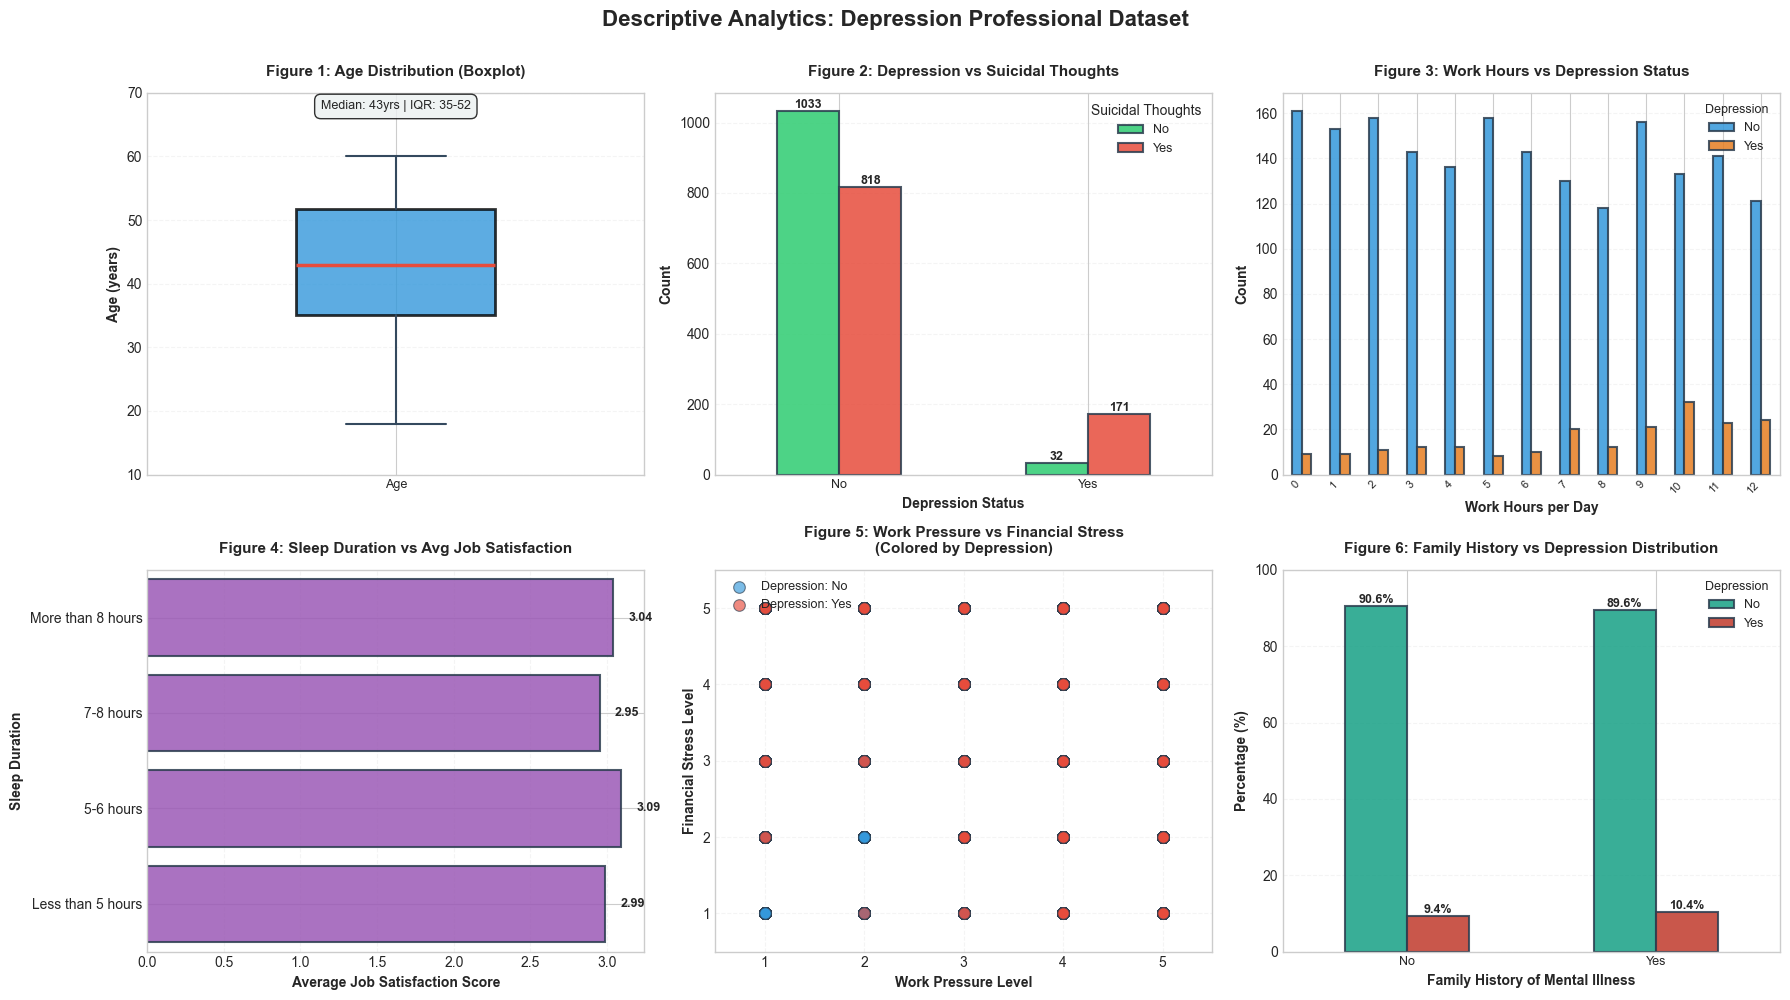

In [79]:
# Create a large figure with 6 subplots with improved spacing and clarity
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Descriptive Analytics: Depression Professional Dataset', fontsize=16, fontweight='bold', y=0.995)

# =====================================================================
# VISUALIZATION 1: BOXPLOT OF AGE (REQUIRED)
# =====================================================================
ax1 = plt.subplot(2, 3, 1)
bp = ax1.boxplot(df['Age'], vert=True, patch_artist=True, widths=0.4)

# Customize boxplot with better colors and styling
for patch in bp['boxes']:
    patch.set_facecolor('#3498db')
    patch.set_alpha(0.8)
    patch.set_linewidth(2)
for median in bp['medians']:
    median.set(color='#e74c3c', linewidth=2.5)
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5, color='#34495e')
for cap in bp['caps']:
    cap.set(linewidth=1.5, color='#34495e')

ax1.set_ylabel('Age (years)', fontsize=10, fontweight='bold')
ax1.set_title('Figure 1: Age Distribution (Boxplot)', fontsize=11, fontweight='bold', pad=12)
ax1.grid(True, alpha=0.2, axis='y', linestyle='--')
ax1.set_xticklabels(['Age'], fontsize=9)
ax1.set_ylim(10, 70)

# Add statistics as annotations
age_median = df['Age'].median()
age_q1 = df['Age'].quantile(0.25)
age_q3 = df['Age'].quantile(0.75)
ax1.text(0.5, 0.98, f'Median: {age_median:.0f}yrs | IQR: {age_q1:.0f}-{age_q3:.0f}', 
         transform=ax1.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='#ecf0f1', alpha=0.8, pad=0.5))

print("✓ Figure 1 created: Age Boxplot")

# =====================================================================
# VISUALIZATION 2: DEPRESSION VS SUICIDAL THOUGHTS (RELATIONSHIP)
# =====================================================================
ax2 = plt.subplot(2, 3, 2)

depression_suicidal = pd.crosstab(df['Depression'], df['Have you ever had suicidal thoughts ?'])
depression_suicidal.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'], 
                         width=0.5, edgecolor='#2c3e50', linewidth=1.5, alpha=0.85)

ax2.set_title('Figure 2: Depression vs Suicidal Thoughts', fontsize=11, fontweight='bold', pad=12)
ax2.set_xlabel('Depression Status', fontsize=10, fontweight='bold')
ax2.set_ylabel('Count', fontsize=10, fontweight='bold')
ax2.legend(title='Suicidal Thoughts', labels=['No', 'Yes'], loc='upper right', fontsize=9)
ax2.set_xticklabels(['No', 'Yes'], rotation=0, fontsize=9)
ax2.grid(True, alpha=0.2, axis='y', linestyle='--')
ax2.set_axisbelow(True)

# Add value labels on bars with better formatting
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', fontsize=9, fontweight='bold')

print("✓ Figure 2 created: Depression vs Suicidal Thoughts")

# =====================================================================
# VISUALIZATION 3: WORK HOURS VS DEPRESSION (RELATIONSHIP)
# =====================================================================
ax3 = plt.subplot(2, 3, 3)

work_depression = df.groupby(['Work Hours', 'Depression']).size().unstack(fill_value=0)
work_depression.plot(kind='bar', ax=ax3, color=['#3498db', '#e67e22'], 
                     width=0.5, edgecolor='#2c3e50', linewidth=1.5, alpha=0.85)

ax3.set_title('Figure 3: Work Hours vs Depression Status', fontsize=11, fontweight='bold', pad=12)
ax3.set_xlabel('Work Hours per Day', fontsize=10, fontweight='bold')
ax3.set_ylabel('Count', fontsize=10, fontweight='bold')
ax3.legend(title='Depression', labels=['No', 'Yes'], loc='upper right', fontsize=9, title_fontsize=9)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax3.grid(True, alpha=0.2, axis='y', linestyle='--')
ax3.set_axisbelow(True)

print("✓ Figure 3 created: Work Hours vs Depression")

# =====================================================================
# VISUALIZATION 4: SLEEP DURATION VS JOB SATISFACTION (RELATIONSHIP)
# =====================================================================
ax4 = plt.subplot(2, 3, 4)

sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sleep_sat = df.groupby('Sleep Duration')['Job Satisfaction'].mean().reindex(sleep_order)

bars = ax4.barh(sleep_sat.index, sleep_sat.values, color='#9b59b6', edgecolor='#2c3e50', 
                 linewidth=1.5, alpha=0.85)

ax4.set_title('Figure 4: Sleep Duration vs Avg Job Satisfaction', fontsize=11, fontweight='bold', pad=12)
ax4.set_xlabel('Average Job Satisfaction Score', fontsize=10, fontweight='bold')
ax4.set_ylabel('Sleep Duration', fontsize=10, fontweight='bold')
ax4.grid(True, alpha=0.2, axis='x', linestyle='--')
ax4.set_axisbelow(True)
ax4.set_ylim(-0.5, len(sleep_sat)-0.5)

# Add value labels with better formatting
for i, (idx, val) in enumerate(sleep_sat.items()):
    ax4.text(val + 0.1, i, f'{val:.2f}', va='center', fontweight='bold', fontsize=9)

print("✓ Figure 4 created: Sleep Duration vs Job Satisfaction")

# =====================================================================
# VISUALIZATION 5: WORK PRESSURE VS FINANCIAL STRESS (RELATIONSHIP - SCATTER)
# =====================================================================
ax5 = plt.subplot(2, 3, 5)

colors = {'Yes': '#e74c3c', 'No': '#3498db'}
for depression in ['No', 'Yes']:
    mask = df['Depression'] == depression
    ax5.scatter(df[mask]['Work Pressure'], df[mask]['Financial Stress'],
               alpha=0.65, s=70, label=f'Depression: {depression}',
               color=colors[depression], edgecolors='#2c3e50', linewidth=0.8)

ax5.set_title('Figure 5: Work Pressure vs Financial Stress\n(Colored by Depression)', 
             fontsize=11, fontweight='bold', pad=12)
ax5.set_xlabel('Work Pressure Level', fontsize=10, fontweight='bold')
ax5.set_ylabel('Financial Stress Level', fontsize=10, fontweight='bold')
ax5.legend(loc='upper left', framealpha=0.9, fontsize=9)
ax5.grid(True, alpha=0.2, linestyle='--')
ax5.set_axisbelow(True)
ax5.set_xticks(range(1, 6))
ax5.set_yticks(range(1, 6))
ax5.set_xlim(0.5, 5.5)
ax5.set_ylim(0.5, 5.5)

print("✓ Figure 5 created: Work Pressure vs Financial Stress")

# =====================================================================
# VISUALIZATION 6: FAMILY HISTORY VS DEPRESSION (RELATIONSHIP)
# =====================================================================
ax6 = plt.subplot(2, 3, 6)

family_depression = pd.crosstab(df['Family History of Mental Illness'], df['Depression'])
family_depression_pct = family_depression.div(family_depression.sum(axis=1), axis=0) * 100

family_depression_pct.plot(kind='bar', ax=ax6, color=['#16a085', '#c0392b'], 
                           width=0.5, edgecolor='#2c3e50', linewidth=1.5, alpha=0.85, stacked=False)

ax6.set_title('Figure 6: Family History vs Depression Distribution', fontsize=11, fontweight='bold', pad=12)
ax6.set_xlabel('Family History of Mental Illness', fontsize=10, fontweight='bold')
ax6.set_ylabel('Percentage (%)', fontsize=10, fontweight='bold')
ax6.legend(title='Depression', labels=['No', 'Yes'], loc='upper right', fontsize=9, title_fontsize=9)
ax6.set_xticklabels(['No', 'Yes'], rotation=0, fontsize=9)
ax6.grid(True, alpha=0.2, axis='y', linestyle='--')
ax6.set_axisbelow(True)
ax6.set_ylim(0, 100)

# Add percentage labels on bars
for container in ax6.containers:
    ax6.bar_label(container, fmt='%.1f%%', fontsize=9, fontweight='bold')

print("✓ Figure 6 created: Family History vs Depression")

# Save all figures with improved quality
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('output_files/Task1b_Visualizations.png', dpi=300, bbox_inches='tight', facecolor='white')
print("\n✓ All visualizations saved to: output_files/Task1b_Visualizations.png")
plt.show()